Here we will make a movie of detailed time structure of a synchrotron pulse. Radiation from moving charge incledes velocity and radiation fields. Here we only discuss the acceleration field. First, we import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

The radiated electric firld changing with time is: $$E(r,t) = \frac{q n\times[(n-\beta)\times\dot\beta]}{cR\kappa^3}$$ where $\kappa =1-n\cdot\beta$. Then let's choose $\hat n =\hat x$ and $\vec{\beta} = \beta cos(\omega t)\hat x +\beta sin(\omega t)\hat y$. After some calculation $$E(r,t) = \frac{q \omega\beta(\beta-cos(\omega t))}{cR(1-\beta cos(\omega t))^3}\hat y$$ Now,input the constant physics quantities referred in the pulse.

In [2]:
omega = 1
q = -1.6*10**-19
c = 3*10**10
R=500
A=q*omega/c/R

In put $\beta$ value. When we consifer nonrelativistic case, should input a small value; If relativistic case, a large value. Let's look at nonrelativistic first.

In [3]:
beta = 0.01

Define the independent variable t while calculate it's corresponding electric field and graph the function to see what it looks like.

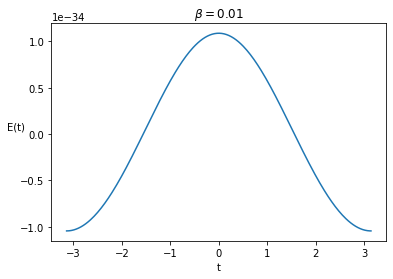

In [4]:
t = np.linspace(-np.pi, np.pi, 256)
E = A*beta*(beta-np.cos(t))/(1-beta*np.cos(t))**3
plt.xlabel('t')
plt.ylabel('E(t)',rotation = 0)
plt.title(r'$\beta =$' +str(beta) )
plt.plot(t,E)
plt.show()

It's more like a wave function.In order to know the detailed time structure of this pulse with different beta value, let's make a movie. Firse, set up the figure, the axis, and the plot element we want to animate:

Text(0, 0.5, 'E(t)')

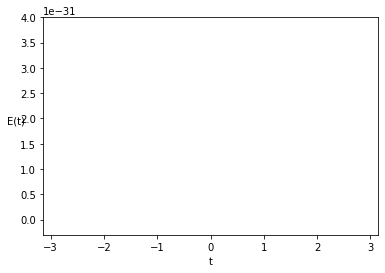

In [5]:
fig, ax = plt.subplots()
ax.set_xlim((-np.pi, np.pi))
ax.set_ylim((-0.3*10**-31, 4*10**-31))
ax.set_xlabel('t')
ax.set_ylabel('E(t)',rotation = 0)

Redefine the initial beta value

In [6]:
beta = 0.01
A=q*omega/c/R
t = np.linspace(-np.pi, np.pi, 256)
E = A*beta*(beta-np.cos(t))/(1-beta*np.cos(t))**3
line, = ax.plot(t,E)

Define the initialization function, which plots the background of each frame:

In [7]:
def init():
    line.set_ydata(E)
    return line,

Define the animation function, which is called for each new frame:

In [8]:
def animate(i):
    beta = 0.01*i
    E = A*beta*(beta-np.cos(t))/(1-beta*np.cos(t))**3
    line.set_ydata(E)
    ax.set_title(r'$\beta =$' +str(beta))
    return line,

Compile the animation. Setting **blit=False** will only re-draw the parts that have changed.

In [9]:
anim = animation.FuncAnimation(fig=fig, func=animate,
                               init_func=init, frames=85,
                               interval=35,blit=False)

Now disply the animation

In [10]:
HTML(anim.to_jshtml())